In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
import numpy as np

In [25]:
def convolve(image : np.array ,  kernel : np.array) -> np.array:
    kernel = np.flip(kernel)
    ih, iw = image.shape
    kh , kw = kernel.shape
    border_size = kh//2
    img_bordered = cv2.copyMakeBorder(image, border_size, border_size, border_size, border_size, cv2.BORDER_CONSTANT)
    bh,bw = img_bordered.shape
    result = np.zeros((ih, iw), dtype=np.float32)
    for i in range(ih):
        for j in range(iw):
            region = img_bordered[i:i+kh ,j:j+kw]
            mul = np.multiply(region,kernel)
            val = np.sum(mul)
            result[i,j] = val 
            # rh , rw = region.shape 
            # sum = 0 
            # for k in range(rh):
            #     for l in range(rw):
            #         mul = region[k,l] * kernel[k,l]
            #         sum = sum + mul
            # result[i,j] = sum 
    return result 
def Gaussian_Smoothing_Function(u,v,sigma):
    return (1/(2*np.pi*sigma**2))*np.exp(-(u**2 + v**2) /(sigma**2))

def Gaussian_Sharp_Function(u,v,sigma):
    return (((u**2 + v**2  - 2 * sigma**2)/sigma**4) * np.exp(-(u**2+v**2)/(2*sigma**2)))

def Gaussian_Smoothing_kernel(size , sigma):
    k = size // 2
    kernel = np.zeros((size,size ) , dtype=np.float32)
    for i in range(size):
        for j in range(size):
            u = i - k
            v = j - k 
            kernel[i,j] = Gaussian_Smoothing_Function(u,v,sigma)
    kernel /= np.sum(kernel)
    return kernel 
def Gaussian_Sharpenning_kernel(size , sigma):
    k = size // 2
    kernel = np.zeros((size,size ) , dtype=np.float32)
    for i in range(size):
        for j in range(size):
            u = i - k
            v = j - k 
            kernel[i,j] = Gaussian_Sharp_Function(u,v,sigma)
    kernel /= np.sum(kernel)
    return kernel 
smoothing_kernel = Gaussian_Smoothing_kernel(5, 5)
sharpening_kernel = Gaussian_Sharpenning_kernel(7, 1)
print("Smoothing Kernel:\n", smoothing_kernel)
print("Sharpening Kernel:\n", sharpening_kernel)

Smoothing Kernel:
 [[0.03393435 0.03826088 0.03982234 0.03826088 0.03393435]
 [0.03826088 0.04313902 0.04489956 0.04313902 0.03826088]
 [0.03982234 0.04489956 0.04673195 0.04489956 0.03982234]
 [0.03826088 0.04313902 0.04489956 0.04313902 0.03826088]
 [0.03393435 0.03826088 0.03982234 0.03826088 0.03393435]]
Sharpening Kernel:
 [[-3.8457531e-02 -3.2209969e-01 -1.0498551e+00 -1.5145537e+00
  -1.0498551e+00 -3.2209969e-01 -3.8457531e-02]
 [-3.2209969e-01 -2.1403515e+00 -4.7961950e+00 -5.2717257e+00
  -4.7961950e+00 -2.1403515e+00 -3.2209969e-01]
 [-1.0498551e+00 -4.7961950e+00 -0.0000000e+00  1.1813118e+01
  -0.0000000e+00 -4.7961950e+00 -1.0498551e+00]
 [-1.5145537e+00 -5.2717257e+00  1.1813118e+01  3.8953079e+01
   1.1813118e+01 -5.2717257e+00 -1.5145537e+00]
 [-1.0498551e+00 -4.7961950e+00 -0.0000000e+00  1.1813118e+01
  -0.0000000e+00 -4.7961950e+00 -1.0498551e+00]
 [-3.2209969e-01 -2.1403515e+00 -4.7961950e+00 -5.2717257e+00
  -4.7961950e+00 -2.1403515e+00 -3.2209969e-01]
 [-3.84575

In [37]:
def smooth_image(image):
    b_channel ,g_channel ,r_channel = cv2.split(image)
    smooth_convolved_b = convolve(b_channel, smoothing_kernel)
    smooth_convolved_g = convolve(g_channel, smoothing_kernel)
    smooth_convolved_r = convolve(r_channel, smoothing_kernel)
    smooth_convolved_image = cv2.merge((smooth_convolved_b, smooth_convolved_g, smooth_convolved_r))
    normalized_result = cv2.normalize(smooth_convolved_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return normalized_result




In [27]:
image = cv2.imread('Lena.jpg')
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Blurrig the image

In [28]:
blur_image = smooth_image(image)
cv2.imshow('Blurred Image', blur_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Substact the Original Image

In [29]:
def substract_image(image, smooth_image):
    subtracted_image = cv2.subtract(image, smooth_image)
    normalized_result = cv2.normalize(subtracted_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    cv2.imshow('Subtracted Image', normalized_result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return normalized_result

mask = substract_image(image, blur_image)
cv2.imshow('Subtracted Image', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

Add Mask To original

In [30]:
def add_mask(image , mask , k = 1.3):
    masked_image = image + mask * k 
    normalized_result = cv2.normalize(masked_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    cv2.imshow('Masked Image', normalized_result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return normalized_result

sharped_image = add_mask(image , mask)

Comparision Between Unsharp masking and Original Image

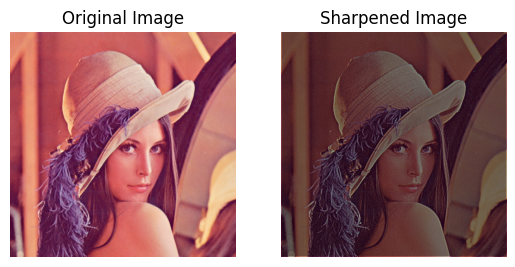

In [31]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharped_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')
plt.show()

Lab -2 Task Practise Starts here

Edge Detection Using Gradient

In [ ]:
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]], dtype=np.float32)
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]], dtype=np.float32)

def magnitude(grad_x , grad_y):
    return np.sqrt(grad_x**2 + grad_y**2) 

def derivative(image, kernel):
    b_channel, g_channel, r_channel = cv2.split(image)
    convolved_b = convolve(b_channel, kernel)
    convolved_g = convolve(g_channel, kernel)
    convolved_r = convolve(r_channel, kernel)
    convolved_image = cv2.merge((convolved_b, convolved_g, convolved_r))
    normalized_result = cv2.normalize(convolved_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return normalized_result

def gradient(image):
    b_channel, g_channel, r_channel = cv2.split(image)
    gradient_b_x = convolve(b_channel, sobel_x)
    gradient_b_y = convolve(b_channel, sobel_y)
    gradient_g_x = convolve(g_channel, sobel_x)
    gradient_g_y = convolve(g_channel, sobel_y)
    gradient_r_x = convolve(r_channel, sobel_x)
    gradient_r_y = convolve(r_channel, sobel_y)

    magnitude_b = magnitude(gradient_b_x, gradient_b_y)
    magnitude_g = magnitude(gradient_g_x, gradient_g_y)
    magnitude_r = magnitude(gradient_r_x, gradient_r_y)

    magnitude_image = cv2.merge((magnitude_b, magnitude_g, magnitude_r))
    normalized_result = cv2.normalize(magnitude_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)  
    return normalized_result   

def orientation(grad_x , grad_y):
    return np.arctan2(grad_y, grad_x) * (180 / np.pi)


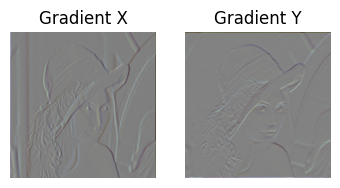

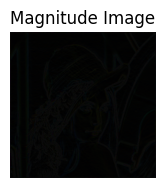

In [42]:
image_smooth = smooth_image(image)
smooth_x = derivative(image_smooth, sobel_x)
smooth_y = derivative(image_smooth, sobel_y)
magnitude_image = magnitude(smooth_x, smooth_y)
norm_magnitude_image = cv2.normalize(magnitude_image.astype(np.uint8), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
plt.subplot(1, 3, 1)
plt.imshow(smooth_x)
plt.title('Gradient X')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(smooth_y)
plt.title('Gradient Y')
plt.axis('off')
plt.show()
plt.subplot(1,3,3)
plt.imshow(magnitude_image.astype(np.uint8))
plt.title('Magnitude Image')
plt.axis('off')
plt.show()
cv2.imshow('Magnitude Image', norm_magnitude_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [52]:
def hysteresis_thresholding(image, low_threshold, high_threshold):
    strong = 255
    weak = 75
    result = np.zeros_like(image, dtype=np.uint8)
    
    strong_i, strong_j = np.where(image >= high_threshold)
    weak_i, weak_j = np.where((image <= high_threshold) & (image >= low_threshold))
    
    result[strong_i, strong_j] = strong
    result[weak_i, weak_j] = weak
    
    return result
def thresshold_image_3D(image , low_threshold, high_threshold):
    b,g,r = cv2.split(image)
    b = hysteresis_thresholding(b, low_threshold, high_threshold)
    g = hysteresis_thresholding(g, low_threshold, high_threshold)
    r = hysteresis_thresholding(r, low_threshold, high_threshold)
    return cv2.merge((b, g, r))

thresshold_image =  thresshold_image_3D(norm_magnitude_image,50,150)
cv2.imshow('Hysteresis Thresholding', thresshold_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
def canny(image, low_threshold, high_threshold):
    smooth_image = cv2.GaussianBlur(image, (5, 5), 1.4)
    grad_x = derivative(smooth_image, sobel_x)
    grad_y = derivative(smooth_image, sobel_y)
    magnitude_image = magnitude(grad_x, grad_y)
    norm_magnitude_image = cv2.normalize(magnitude_image.astype(np.uint8), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    thressholded_image = thresshold_image_3D(norm_magnitude_image, low_threshold, high_threshold)
    
    return thressholded_image

canny_image = canny(image, 50, 150)
cv2.imshow('Canny Edge Detection', canny_image)
cv2.waitKey(0)
cv2.destroyAllWindows()